# 8. 트리의 부모 찾기
[문제 링크](https://www.acmicpc.net/problem/11725)

In [ ]:
n = int(input())
# 각 노드에 연결된 노드 정보를 담는 리스트
graph = [[] for _ in range(n+1)]
# 각 노드의 부모 노드를 담는 리스트
parent = [0] * (n+1)
# 루트 노드는 1이므로 표시
parent[1] = -1

# DFS로 부모 노드를 채워넣는 함수
def fill_parent(node):
    global parent, graph
    # 노드와 연결된 간선들을 가져옴
    edges = graph[node]
    # 부모 노드가 아직 없는 노드들을 찾아서 부모 노드를 입력
    for child_node in edges:
        if parent[child_node] == 0:
            parent[child_node] = node
            # 자식 노드에 대해서도 부모 노드를 채워넣음
            fill_parent(child_node)

# 모든 간선 정보 입력받고 그래프에 연결
# 양방향으로 연결
for _ in range(n-1):
    n1, n2 = map(int, input().split())
    graph[n1].append(n2)
    graph[n2].append(n1)

# 루트 노드부터 시작해서 부모 노드를 채워넣음
fill_parent(1)

# 부모 노드 출력
for i in range(2, n+1):
    print(parent[i])

## 실패
- DFS를 재귀로 구현했으나, 재귀의 깊이가 너무 깊어짐.
- 스택으로 다시 짤 필요성이 있음.
- 어느쪽이 부모 노드일지 모르기 때문에 양방향 그래프로 설정.
    - 때문에 부모노드쪽으로 한번 더 탐색하는 불편함이 있음.

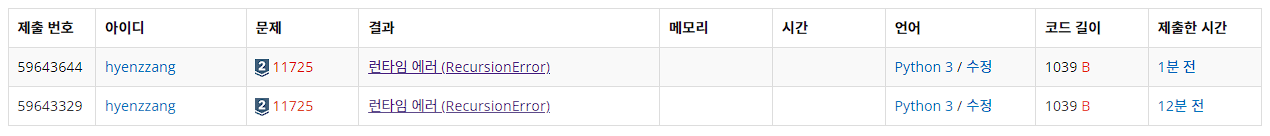

In [ ]:
n = int(input())
# 각 노드에 연결된 노드 정보를 담는 리스트
graph = [[] for _ in range(n+1)]
# 각 노드의 부모 노드를 담는 리스트
parent = [0] * (n+1)
# 루트 노드는 1이므로 표시
parent[1] = -1
# DFS에 사용할 스택
stack = [1]

# DFS로 부모 노드를 채워넣는 함수
def fill_parent():
    global parent, graph
    while stack:
        node = stack.pop()
        # 노드와 연결된 간선들을 가져옴
        edges = graph[node]
        # 부모 노드를 아직 못 찾은 경우
        for child_node in edges:
            if parent[child_node] == 0:
                parent[child_node] = node   # 부모 노드를 입력
                stack.append(child_node)    # 자식 노드를 스택에 추가

# 모든 간선 정보 입력받고 그래프에 연결
# 양방향으로 연결
for _ in range(n-1):
    n1, n2 = map(int, input().split())
    graph[n1].append(n2)
    graph[n2].append(n1)

# 루트 노드부터 시작해서 부모 노드를 채워넣음
fill_parent()

# 부모 노드 출력
for i in range(2, n+1):
    print(parent[i])

## 성공
- 재귀방식의 DFS에서 stack방식의 DFS로 변경.
    - 재귀의 깊이로 인한 런타임 오류 수정.
- 재귀형식의 코드를 최대한 재사용 하고 싶었기 때문에, 함수를 불러오는 형식은 그대로.
- n * (n-1)*2 이기때문에 O(n^2)의 복잡도.
    - 때문에 상당히 느린편.

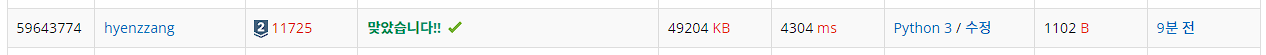

# 9. 순위
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/49191)

In [ ]:
players = {}
n_ = 0

# DFS 방식으로 승리(혹은 패배)쪽으로 탐색, 결과를 자기 자신에게 업데이트
# 탐색 후 결정 가능 상태를 업데이트한다.
def dfs_w_or_l(p, w_or_l : str):
    global players, n_
    # 승리(혹은 패배)한 선수들의 리스트
    wl_l = list(players[p][w_or_l])
    # 승리(혹은 패배)한 선수들이 없으면 빈 집합 반환
    if wl_l == []:
        return set()
    
    # 결정 가능 상태 업데이트
    if n_ == len(players[p]['win']) + len(players[p]['lose']) + 1:
        return players[p][w_or_l]
    
    # 플레이어가 순위를 매길 수 있는 상태이면 승리(혹은 패배)한 선수들을 반환
    if players[p]['is_decision'] == True:
        players[p]['is_decision'] = True
    
    # 승리(혹은 패배)한 선수들의 승리(혹은 패배)한 선수들을 재귀적으로 탐색
    # 탐색한 결과를 승패 집합에 업데이트
    for p_ in wl_l:
        players[p][w_or_l].update(dfs_w_or_l(p_, w_or_l))
        
    # 결정 가능 상태 업데이트
    if n_ == len(players[p]['win']) + len(players[p]['lose']) + 1:
        players[p]['is_decision'] = True
    
    # 승리(혹은 패배)한 선수들의 승리(혹은 패배)한 선수들을 반환
    return players[p][w_or_l]


def solution(n, results):
    global players, n_
    n_ = n
    # 선수 번호를 키로 하는 딕셔너리 생성
    # 값은 다른 선수 번호들과의 승패 여부 딕셔너리
    players = { k : {'win' : set(), 'lose' : set() , 'is_decision' : False } for k in range(1, n+1)}
    
    # 승패 결과를 딕셔너리에 저장
    for result in results:
        players[result[0]]['win'].add(result[1])
        players[result[1]]['lose'].add(result[0])
    
    for p in players.keys():
        # 승+패+자신 = 모든 플레이어인 경우 결정 가능
        if n_ == len(players[p]['win']) + len(players[p]['lose']) + 1:
            # 결정 가능 상태를 True로 변경
            players[p]['is_decision'] = True
            continue
        # 승리 상태와 패배 상태를 DFS를 통해 업데이트
        players[p]['win'].update(dfs_w_or_l(p, 'win'))
        players[p]['lose'].update(dfs_w_or_l(p, 'lose'))
        
    # 순위를 매길 수 있는 선수들의 수를 반환
    answer = sum(players[p]['is_decision'] for p in players.keys())
    return answer

In [ ]:
print(solution(5, [[4,3],[4,2],[3,2],[1,2],[2,5]]))
print(solution(5, [[1,2],[2,3],[3,4],[4,5]]))
print(solution(5, [[1,2],[2,3],[3,4],[4,5],[2,4],[2,5]]))

2
5
5


## 실패
- 재귀를 통한 DFS방식으로 구현
- 결정 가능 상태의 판별방법
    - 자신보다 강한상대보다 강한상대에게는 무조건 짐. 반대도 마찬가지.
    - 이때 승(또는 패)간선을 따라 계속 승(패) 결과를 업데이트.
    - 이때 결과표의 승+패 선수의 합이 n-1(자기자신)일 경우 모든 선수와의 승패 여부를 알 수 있음.
    - 모든 선수들과의 승패여부를 알 수 있는 선수의 순위는 결정 가능함.
- 효율성 문제로 실패

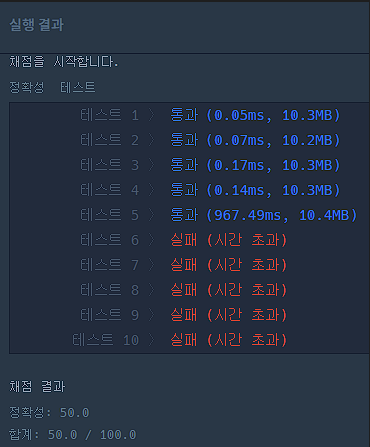

In [ ]:
players = {}
n_ = 0

# DFS 방식으로 승리(혹은 패배)쪽으로 탐색, 결과를 자기 자신에게 업데이트
# 탐색 후 결정 가능 상태를 업데이트한다.
def dfs_w_or_l(p, w_or_l : str):
    global players, n_
    # 승리(혹은 패배)한 선수들의 리스트
    wl_l = list(players[p][w_or_l])
    
    # 승리(혹은 패배)한 선수들이 없으면 빈 집합 반환
    if wl_l == []:
        return set()
    
    # 이전에 탐색한 경우 탐색 결과 반환
    if players[p]['is_visit'][w_or_l]:
        return players[p][w_or_l]
    
    # 플레이어가 순위를 매길 수 있는 상태이면 승리(혹은 패배)한 선수들을 반환
    if players[p]['is_decision'] == True:
        return players[p][w_or_l]
    
    # 승리(혹은 패배)한 선수들의 승리(혹은 패배)한 선수들을 재귀적으로 탐색
    # 탐색한 결과를 승패 집합에 업데이트
    for p_ in wl_l:
        players[p][w_or_l].update(dfs_w_or_l(p_, w_or_l))
        
    # 결정 가능 상태 업데이트
    if n_ == len(players[p]['win']) + len(players[p]['lose']) + 1:
        players[p]['is_decision'] = True
    
    players[p]['is_visit'][w_or_l] = True
    # 승리(혹은 패배)한 선수들의 승리(혹은 패배)한 선수들을 반환
    return players[p][w_or_l]


def solution(n, results):
    global players, n_
    n_ = n
    # 선수 번호를 키로 하는 딕셔너리 생성
    # 값은 다른 선수 번호들과의 승패 여부 집합, 결정 가능 여부, 승/패 방향별 방문 여부 딕셔너리
    # 집합으로 만든 이유는 중복된 선수 번호를 저장하지 않기 위함
    players = { k : {'win' : set(), 'lose' : set() , 'is_decision' : False, 'is_visit':{'win':False, 'lose':False}} for k in range(1, n+1)}
    
    # 승패 결과를 딕셔너리에 저장
    for result in results:
        players[result[0]]['win'].add(result[1])
        players[result[1]]['lose'].add(result[0])
    
    for p in players.keys():
        # 승+패+자신 = 모든 플레이어인 경우 결정 가능
        if n_ == len(players[p]['win']) + len(players[p]['lose']) + 1:
            # 결정 가능 상태를 True로 변경
            players[p]['is_decision'] = True
            continue
        # 승리 상태와 패배 상태를 DFS를 통해 업데이트
        players[p]['win'].update(dfs_w_or_l(p, 'win'))
        players[p]['lose'].update(dfs_w_or_l(p, 'lose'))
        
    # 순위를 매길 수 있는 선수들의 수를 반환
    answer = sum(players[p]['is_decision'] for p in players.keys())
    return answer

## 성공
- 가장 중요한 탐색 여부 확인을 빼먹었음.
- 탐색시, 탐색여부 확인이 없을 경우 같은곳을 계속 방문할 가능성이 있음.
- 코드가 조금 난해한 감이 있음.
    - 따로더 간략화 시켜봐야 할듯.

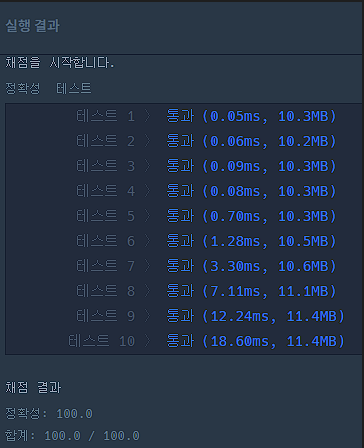

# 10. 가장 먼 노드
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/49189)

In [36]:
from collections import deque

def solution(n, edges):
    # BFS를 위한 큐 생성
    qu = deque()
    # 각 노드의 1부터의 거리를 저장하는 리스트, 방문여부를 확인하기 위해 -1로 초기화
    distances = [-1] * (n+1)
    # 각 노드의 연결된 노드들을 저장하는 리스트
    nodes = [[] for _ in range(n+1)]
    
    # nodes = [[]] * (n+1)  -> 참조가 복사되어서 같은 리스트가 n+1개 생성됨
    
    # print(edges)
    # print(nodes)
    
    # 각 노드에 간선들을 저장
    for edge in edges:
        # print(edge)
        nodes[edge[0]].append(edge[1])
        nodes[edge[1]].append(edge[0])
        # print(nodes)
    
    # print(nodes)
    
    # 1번 노드를 큐에 삽입
    qu.append(1)
    # 1번 노드의 거리를 0으로 설정
    distances[1] = 0
    
    # 큐가 빌 때까지 반복
    while qu:
        # 큐에서 노드를 꺼냄
        node = qu.popleft()
        # 노드의 간선들을 확인
        for next_node in nodes[node]:
            # 방문하지 않은 노드인 경우
            if distances[next_node] == -1:
                # 거리를 현재 노드의 거리 + 1로 설정
                distances[next_node] = distances[node] + 1
                # 큐에 삽입
                qu.append(next_node)
                
    # print(distances)
    
    # 최대 거리를 구함
    max_distance = max(distances)    
    # 최대 거리를 가진 노드의 수를 구함
    answer = distances.count(max_distance)
    
    return answer

In [37]:
solution(6, [[3, 6], [4, 3], [3, 2], [1, 3], [1, 2], [2, 4], [5, 2]])

3

# 성공
- 알고리즘 자체는 빠르게 설계함.
- 원인 모를 버그로 인해 distances, nodes를 살펴봄.
- nodes 리스트의 값이 이상해져있음.
- 간선들을 저장할 빈 2차원 리스트를 초기화 할 때 문제발생.
    - ```[[]] * (n+1)``` 방식으로 초기화 할 경우.
    - 모든 리스트가 참조복사되어, 모든 값이 같이 들어감.
    - ```nodes = [[] for _ in range(n+1)]``` 방식의 컴프리 헨션으로 바꿈.

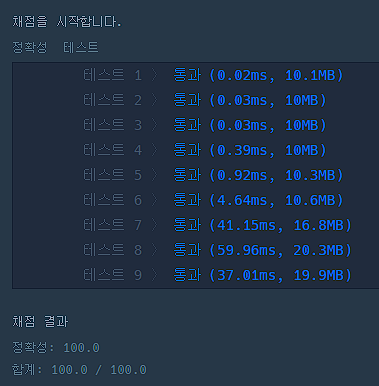